In [116]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron

In [117]:
data = pd.read_csv("D:/g drive/3rd year/5th sem/AML lab/Ex8 - Perceptron/diabetes.csv")
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [118]:
data.isnull().sum()
data.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

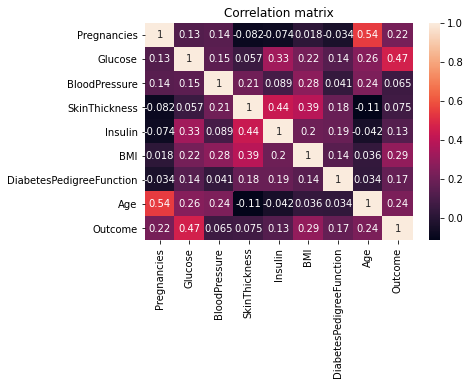

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Correlation matrix')
sns.heatmap(data.corr(),annot = True)
plt.show()

In [120]:
data['Glucose'] = data['Glucose'].mask(data['Glucose'] == 0).fillna(data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].mask(data['BloodPressure'] == 0).fillna(data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].mask(data['SkinThickness'] == 0).fillna(data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].mask(data['Insulin'] == 0).fillna(data['Insulin'].mean())
data['BMI'] = data['BMI'].mask(data['BMI'] == 0).fillna(data['BMI'].mean())
print(data.isin([0]).sum())


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [121]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y=data['Outcome']
data1=[]
data1.append(X)
data1.append(y)
print(data1)

[     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865276      -0.021044       0.872057 -0.417768  0.167255   
1      -0.844885 -1.205989      -0.516583       0.248678 -0.417768 -0.851535   
2       1.233880  2.015979      -0.681762      -0.630654 -0.417768 -1.331821   
3      -0.844885 -1.074480      -0.516583      -0.374700 -0.265107 -0.633222   
4      -1.141852  0.503626      -2.663916       0.872057  0.530423  1.549899   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679954       0.309315       2.222711  0.659428  0.065376   
764    -0.547919  0.010468      -0.186224       0.040885 -0.417768  0.632988   
765     0.342981 -0.022409      -0.021044      -0.374700 -0.071599 -0.909751   
766    -0.844885  0.141977      -1.012121      -0.630654 -0.417768 -0.342140   
767    -0.844885 -0.942972      -0.186224       0.456471 -0.417768 -0.298477   

     DiabetesPedigreeFunction       Ag

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [123]:
from sklearn.metrics import accuracy_score

model=Perceptron()
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.7083333333333334


In [124]:
print("Weights :\n",model.coef_)
print("Bias:\n",model.intercept_)

Weights :
 [[ 1.30077497  3.00877494 -0.167463    1.10323742  2.07706841  2.71402044
  -1.56893592  1.61356515]]
Bias:
 [-4.]


In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,columns = ['Predicted Negative', 'Predicted Positive'],index = ['Actual Negative', 'Actual Positive'])
print("confusion matrix is:")
print(cm_df)

confusion matrix is:
                 Predicted Negative  Predicted Positive
Actual Negative                 100                  23
Actual Positive                  33                  36


# PERCEPTRON FROM SCRACH  

In [126]:
from numpy import random ,dot
from random import choice
from matplotlib import pyplot as plt

In [127]:
X=np.array(data.iloc[:,:-1])
X.shape

(768, 8)

In [128]:
Y=np.array(data.iloc[:,-1])
Y.shape

(768,)

In [129]:
bias=[1 for i in range(X.shape[0])]

In [130]:
X = np.column_stack((X,bias))
print(X.shape)

(768, 9)


In [131]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [132]:

weights = np.array(np.random.rand(X.shape[1])) 
error =[]
n = 100

In [133]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.639947,-0.778585,-1.177301,0.664264,0.766932,0.225472,-0.126471,0.830381
324,-0.547919,-0.318304,0.226725,0.560368,-0.417768,0.472892,-0.978145,-1.041549
624,-0.547919,-0.449813,-0.681762,-0.630654,-0.417768,-0.240261,-0.947944,-1.041549
690,1.233880,-0.482690,0.639674,-0.630654,-0.417768,-1.142617,1.160099,0.064591
473,0.936914,0.470749,1.465571,-0.630654,-0.417768,-0.371248,-0.790898,1.425995
...,...,...,...,...,...,...,...,...
554,-0.844885,-1.238867,-0.681762,-0.374700,-0.039348,0.647542,-0.002647,-0.445935
319,0.639947,2.377628,0.474494,-0.630654,-0.417768,-1.302713,-1.035527,2.191785
594,0.639947,0.043345,-0.021044,1.911021,1.196949,0.167255,0.788625,0.064591
6,-0.250952,-1.436130,-1.838019,0.560368,-0.329609,-0.211152,-0.676133,-0.616111


In [134]:
l_rate =1
step_function = lambda x: 0 if x<0 else 1

In [135]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

[ 2.83258226  1.66428136  0.94058457 -2.78248337  5.56063334  4.24889697
 -0.48072084  1.08313405  0.21300962]
[ 3.26295163  1.9376711   0.11103125 -3.42806729  1.32378927  3.21776763
  2.1739045  -1.25578204  0.21300962]
[ 1.38448408  0.9457314  -0.21777262 -2.58272636  2.94058389  0.95847932
  1.31426389 -1.1948468   0.21300962]
[ 2.06580558  0.58745348  0.28644371 -2.29354313  6.33715839  2.8164645
  0.66148569 -0.45010738  0.21300962]
[ 1.99427069  0.94753355 -0.28097136 -3.16146978  6.87433452  3.31220559
  2.09069    -2.23440199  0.21300962]
[ 2.15280747  1.39283056  0.06360037 -2.62637237  6.56756139  3.19097007
  1.16002942 -2.50451129  0.21300962]
[ 1.57936832  1.11630206 -1.35437968 -2.21393118  6.34873744  3.5285416
  1.68092518  0.60529098  0.21300962]
[ 2.49076149  2.08564052  0.03569155 -1.82421734  2.12219556  4.22888651
  1.47699245 -1.21999644  0.21300962]
[ 2.87936995  1.79075637  0.18374087 -1.70807155  6.33164262  3.56128472
  0.96497616 -0.14609593  0.21300962]
[ 1

[ 1.43668522  2.10758977  0.12612237 -3.57127931  2.58922306  2.8279145
  0.57628138 -1.27029571  0.21300962]
[ 2.7622074   2.25404498 -1.97679577 -3.11771034  2.55596895  1.20473879
  1.38745065 -1.6633834   0.21300962]
[ 3.07966764  2.30975623 -0.01730698 -2.45689171  5.84393319  4.14642169
 -0.19667631 -0.25533619  0.21300962]
[ 1.32261607  4.01043548 -1.95663352 -2.07300697  5.62529026  2.53949178
  0.92403939 -1.240936    0.21300962]
[ 2.71503304  2.76005235 -1.23757876 -1.89745836  2.10564331  4.68022809
  2.23166033 -1.27627844  0.21300962]
[ 1.52252709  0.80273183 -1.02163259 -1.52283761  5.59382038  4.69115169
 -0.64467238  0.10506805  0.21300962]
[ 2.13695379  1.27891194 -0.55746981 -3.04384435  2.54335616  0.80694162
  0.72487672 -2.31583363  0.21300962]
[ 2.38326582  2.82551884 -1.16379795 -1.62298421  3.04142253  1.33249409
  0.15554109 -2.19030704  0.21300962]
[ 2.74674039  3.15471581  0.19651823 -1.60039497  5.90305189  3.93311765
  2.1113668   0.21829681  0.21300962]
[ 

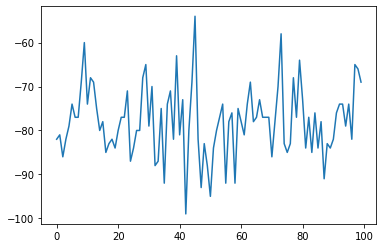

In [139]:
error=[]
for i in range(n):
    epoch_error=[]
    for x,expected in zip(x_train,y_train):
        #print(x,expected)
        result = np.dot(x.transpose(),weights)
        err = expected - step_function(result)
        epoch_error.append(err)
        #print(epoch_error)
        weights+= l_rate *err*x
    print(weights)
    error.append(sum(epoch_error))
plot(error)
plt.show()


# 
# for i in range(n):
#     perceptron(x_train,y_train)

In [137]:
print(weights)

[ 3.04216016  2.81854768 -0.12433868 -1.52837148  2.59623077  4.13740893
  1.66701611 -1.44844819  0.21300962]


In [143]:
count=0
for x,target in zip(x_test,y_test):
    result = np.dot(x.transpose(),weights)
    if(target == step_function(result)):
        count+=1
    print(">{}:{} ---- {}".format(x,result,step_function(result))) 
print("accuracy",count/int(len(x_test)))

>[ 0.63994726 -0.77858541 -1.17730081  0.66426408  0.76693224  0.22547203
 -0.1264714   0.83038113  0.        ]:-1.8350967997450391 ---- 0
>[-0.54791859 -0.31830429  0.22672482  0.56036764 -0.41776815  0.47289246
 -0.97814487 -1.04154944  0.        ]:-3.246174265004898 ---- 0
>[-0.54791859 -0.44981318 -0.68176235 -0.6306536  -0.41776815 -0.24026054
 -0.94794368 -1.04154944  0.        ]:-0.823327729088497 ---- 0
>[ 1.23388019 -0.4826904   0.63967354 -0.6306536  -0.41776815 -1.14261739
  1.16009915  0.06459135  0.        ]:2.357342886827384 ---- 1
>[ 0.93691372  0.47074907  1.46557097 -0.6306536  -0.41776815 -0.37124782
 -0.79089751  1.4259954   0.        ]:-0.8599843227315014 ---- 0
>[ 0.63994726 -0.6141993  -0.0210444   0.56036764  0.76693224  0.76397531
 -0.44660398  1.85143417  0.        ]:-3.6984485591788783 ---- 0
>[-0.84488505 -1.66627044 -2.00319824 -0.8941826  -0.45861409 -1.75389139
 -0.4496241  -0.95646168  0.        ]:-5.5824991374041915 ---- 0
>[-1.14185152 -0.15391817 -0.26

In [147]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for x,target in zip(x_test,y_test):
    result = np.dot(x.transpose(),weights)
    if(target == step_function(result)):
        if(target == 1):
            true_positive+=1
        else:
            true_negative+=1
    else:
        if(target==1):
            false_negative+=1
        else:
            false_positive+=1
    print(">{}:{} ---- {}".format(x,result,step_function(result))) 

>[ 0.63994726 -0.77858541 -1.17730081  0.66426408  0.76693224  0.22547203
 -0.1264714   0.83038113  0.        ]:-1.8350967997450391 ---- 0
>[-0.54791859 -0.31830429  0.22672482  0.56036764 -0.41776815  0.47289246
 -0.97814487 -1.04154944  0.        ]:-3.246174265004898 ---- 0
>[-0.54791859 -0.44981318 -0.68176235 -0.6306536  -0.41776815 -0.24026054
 -0.94794368 -1.04154944  0.        ]:-0.823327729088497 ---- 0
>[ 1.23388019 -0.4826904   0.63967354 -0.6306536  -0.41776815 -1.14261739
  1.16009915  0.06459135  0.        ]:2.357342886827384 ---- 1
>[ 0.93691372  0.47074907  1.46557097 -0.6306536  -0.41776815 -0.37124782
 -0.79089751  1.4259954   0.        ]:-0.8599843227315014 ---- 0
>[ 0.63994726 -0.6141993  -0.0210444   0.56036764  0.76693224  0.76397531
 -0.44660398  1.85143417  0.        ]:-3.6984485591788783 ---- 0
>[-0.84488505 -1.66627044 -2.00319824 -0.8941826  -0.45861409 -1.75389139
 -0.4496241  -0.95646168  0.        ]:-5.5824991374041915 ---- 0
>[-1.14185152 -0.15391817 -0.26

In [148]:
print("accuracy",(true_positive+true_negative)/int(len(x_test)))

accuracy 0.734375


In [150]:
print("True positives :\t",true_positive)
print("True negatives :\t",true_negative)
print("False positives :\t",false_positive)
print("False negatives :\t",false_negative)

True positives :	 52
True negatives :	 89
False positives :	 34
False negatives :	 17
